In [56]:
import cv2
import numpy as np

In [ ]:
#MNIST DIGITS

In [131]:
mnist = cv2.imread('../datasets/digits.png', 0)
print(mnist.shape)
images = [np.hsplit(row, 100) for row in np.vsplit(mnist, 50)]
images = np.array(images, dtype=np.float32)

train_features = images[:, :50].reshape(-1, (20 * 20))
test_features = images[:, 50:100].reshape(-1, (20 * 20))
print(train_features.shape)
print(test_features.shape)

k = np.arange(10)
train_labels = np.repeat(k, 250).reshape(-1, 1)
test_labels = train_labels.copy()

#ADDED FOR MEAN NORMALIZATION
train_features -= np.mean(train_features, axis = 0)
test_features -= np.mean(train_features, axis = 0)

knn = cv2.ml.KNearest_create()
knn.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

ret, result, neighbors, dist = knn.findNearest(test_features, 3)

#check if the results are correct
matches = np.equal(result, test_labels)

#convert bool to int
matches = matches.astype(np.int)

#count the correct predictions
correct = np.count_nonzero(matches)


(1000, 2000)
(2500, 400)
(2500, 400)


In [132]:
#compute the accuracy
accuracy = (correct * 100.00) / result.size

print('Accuracy: {}'.format(accuracy))

Accuracy: 79.24


In [119]:
#FASHION MNIST
fnist = cv2.imread('../datasets/fashion.png', 0)

In [120]:
print(fnist.shape)

(840, 840)


In [121]:
images = [np.hsplit(row, 30) for row in np.vsplit(fnist, 30)]

images = np.array(images, dtype=np.float32)

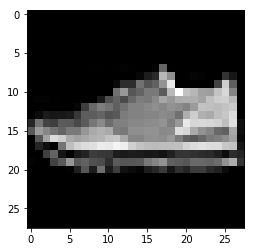

In [122]:
import matplotlib.pyplot as plt

plt.imshow(images[21, 10], cmap='gray')
plt.show()

In [123]:
print(images.shape)

(30, 30, 28, 28)


In [124]:
train_features = images[:, :15].reshape(-1, (28 * 28))
test_features = images[:, 15:30].reshape(-1, (28 * 28))
print(train_features.shape)
print(test_features.shape)

(450, 784)
(450, 784)


In [125]:
k = np.arange(10)
train_labels = np.repeat(k, 45).reshape(-1, 1)
test_labels = train_labels.copy()

#ADDED FOR MEAN NORMALIZATION
train_features -= np.mean(train_features, axis = 0)
test_features -= np.mean(train_features, axis = 0)

In [126]:
knn = cv2.ml.KNearest_create()
knn.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

True

In [127]:
ret, result, neighbors, dist = knn.findNearest(test_features, 3)

In [128]:
#check if the results are correct
matches = np.equal(result, test_labels)

#convert bool to int
matches = matches.astype(np.int)

#count the correct predictions
correct = np.count_nonzero(matches)

#compute the accuracy
accuracy = (correct * 100.00) / result.size

In [129]:
print('Accuracy: {}'.format(accuracy))

Accuracy: 52.0


In [ ]:
#SVM MNIST (DIGITS)

In [100]:
mnist = cv2.imread('../datasets/digits.png', 0)
print(mnist.shape)
images = [np.hsplit(row, 100) for row in np.vsplit(mnist, 50)]
images = np.array(images, dtype=np.float32)

(1000, 2000)


In [101]:
train_features = images[:, :50].reshape(-1, (20 * 20))
test_features = images[:, 50:100].reshape(-1, (20 * 20))
print(train_features.shape)
print(test_features.shape)

k = np.arange(10)
train_labels = np.repeat(k, 250).reshape(-1, 1)
test_labels = train_labels.copy()

#ADDED FOR MEAN NORMALIZATION
train_features -= np.mean(train_features, axis = 0)
test_features -= np.mean(train_features, axis = 0)

knn = cv2.ml.KNearest_create()

(2500, 400)
(2500, 400)


In [102]:
model = cv2.ml.SVM_create()

In [103]:
model.setKernel(cv2.ml.SVM_LINEAR)
model.setC(2.67)
model.setGamma(5.383)
model.setType(cv2.ml.SVM_C_SVC)

In [104]:
model.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

True

In [105]:
result = model.predict(test_features)

In [106]:
matches = np.equal(result[1], test_labels)
matches = matches.astype(np.int)
correct = np.count_nonzero(matches)
accuracy = (correct * 100.00) / result[1].size

In [107]:
print('Accuracy: {}'.format(accuracy))

Accuracy: 66.8


In [ ]:
#SVM FASHION MNIST

In [96]:
fnist = cv2.imread('../datasets/fashion.png', 0)
print(fnist.shape)
images = [np.hsplit(row, 30) for row in np.vsplit(fnist, 30)]
images = np.array(images, dtype=np.float32)

(840, 840)


In [97]:
train_features = images[:, :15].reshape(-1, (28 * 28))
test_features = images[:, 15:30].reshape(-1, (28 * 28))
print(train_features.shape)
print(test_features.shape)

k = np.arange(10)
train_labels = np.repeat(k, 45).reshape(-1, 1)
test_labels = train_labels.copy()

#ADDED FOR MEAN NORMALIZATION
train_features -= np.mean(train_features, axis = 0)
test_features -= np.mean(train_features, axis = 0)

knn = cv2.ml.KNearest_create()
knn.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

ret, result, neighbors, dist = knn.findNearest(test_features, 3)

(450, 784)
(450, 784)


In [98]:
model = cv2.ml.SVM_create()

model.setKernel(cv2.ml.SVM_LINEAR)
model.setC(2.67)
model.setGamma(5.383)
model.setType(cv2.ml.SVM_C_SVC)

model.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

True

In [99]:
result = model.predict(test_features)

matches = np.equal(result[1], test_labels)
matches = matches.astype(np.int)
correct = np.count_nonzero(matches)
accuracy = (correct * 100.00) / result[1].size

print('Accuracy: {}'.format(accuracy))

Accuracy: 56.44444444444444


In [159]:
#PCA MNIST
mnist = cv2.imread('../datasets/digits.png', 0)
print(mnist.shape)
images = [np.hsplit(row, 100) for row in np.vsplit(mnist, 50)]
images = np.array(images, dtype=np.float32)

pca = PCA(n_components = images.shape[1])
pca = PCA(n_components=100)

train_features = images[:, :50].reshape(-1, (20 * 20))
test_features = images[:, 50:100].reshape(-1, (20 * 20))
print(train_features.shape)
print(test_features.shape)

pca.fit(train_features)

k = np.arange(10)
train_labels = np.repeat(k, 250).reshape(-1, 1)
test_labels = train_labels.copy()

knn = cv2.ml.KNearest_create()
knn.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

ret, result, neighbors, dist = knn.findNearest(test_features, 3)

#check if the results are correct
matches = np.equal(result, test_labels)
#convert bool to int
matches = matches.astype(np.int)
#count the correct predictions
correct = np.count_nonzero(matches)

#compute the accuracy
accuracy = (correct * 100.00) / result.size
print('Accuracy: {}'.format(accuracy))

(1000, 2000)
(2500, 400)
(2500, 400)
Accuracy: 91.64


In [160]:
#PCA FASHION MNIST
fnist = cv2.imread('../datasets/fashion.png', 0)
images = [np.hsplit(row, 30) for row in np.vsplit(fnist, 30)]
images = np.array(images, dtype=np.float32)

pca = PCA(n_components = images.shape[1])
pca = PCA(n_components=100)

train_features = images[:, :15].reshape(-1, (28 * 28))
test_features = images[:, 15:30].reshape(-1, (28 * 28))
print(train_features.shape)
print(test_features.shape)

pca.fit(train_features)

k = np.arange(10)
train_labels = np.repeat(k, 45).reshape(-1, 1)
test_labels = train_labels.copy()

knn = cv2.ml.KNearest_create()
knn.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

ret, result, neighbors, dist = knn.findNearest(test_features, 3)

#check if the results are correct
matches = np.equal(result, test_labels)
#convert bool to int
matches = matches.astype(np.int)
#count the correct predictions
correct = np.count_nonzero(matches)

#compute the accuracy
accuracy = (correct * 100.00) / result.size
print('Accuracy: {}'.format(accuracy))

(450, 784)
(450, 784)
Accuracy: 70.88888888888889
